In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

In [103]:
df=pd.read_csv("heart (2).csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
df.dropna(inplace=True)

# Rename columns

In [105]:
df.columns=['Age','Sex','Chest_pain_type','Resting_bp','Cholesterol','Fasting_bp','Resting_ecg','Max_heart_rate','Exercise_induced_angina',
           'ST_depression','ST_slope','Num_major_vessels','Thallium_test','Condition']

In [106]:
df.head(5)

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bp,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain_type          303 non-null    int64  
 3   Resting_bp               303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_bp               303 non-null    int64  
 6   Resting_ecg              303 non-null    int64  
 7   Max_heart_rate           303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Num_major_vessels        303 non-null    int64  
 12  Thallium_test            303 non-null    int64  
 13  Condition                303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [108]:
df.shape[1]

14

In [116]:
results=df[['Condition']].value_counts()
results

Condition
1            165
0            138
dtype: int64

In [115]:
res=df['Sex'].value_counts()
res

1    207
0     96
Name: Sex, dtype: int64

# Exploratory Data analysis

([<matplotlib.patches.Wedge at 0x1fdfc24cc40>,
 [Text(0.15346682740070733, 1.0892419074234896, 'Benign'),
  Text(-0.15346672541851888, -1.0892419217920861, 'Malignant')],
 [Text(0.08370917858220399, 0.5941319495037215, '46%'),
  Text(-0.08370912295555576, -0.5941319573411379, '54%')])

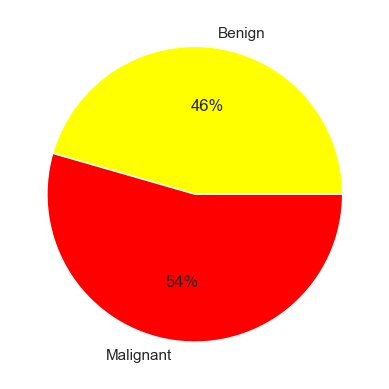

In [112]:
results=df['Condition'].value_counts()
values=[results[0],results[1]]
labels=['Benign','Malignant']
colors = ['Yellow', 'Red']
fig,ax=plt.subplots()
ax.pie(values,labels=labels, colors=colors,autopct='%.0f%%')

In [ ]:
results=df['Sex'].value_counts()
values=[results[0],results[1]]
labels=['Female','Male']
colors = ['Red', 'RoyalBlue']
fig,ax=plt.subplots()
ax.pie(values,labels=labels, colors=colors,autopct='%.0f%%')

In [ ]:
def condition_proportion_sex(data):
     # Bivariate analysis: Sex vs. Condition 
    data['Sex'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot,'data'),x='Sex',y='proportion',hue='Condition',palette='Dark2')
    plt.title('Proportion for Condition of Sex')
    plt.xlabel('Sex(0=Female,1=Male)')

    female_malignant=data[data['Sex']==0]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    male_malignant=data[data['Sex']==1]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    
    print('The proportion of Malignant for Sex:')
    print(f'Female: {female_malignant:.2%}')
    print(f'Male: {male_malignant:.2%}')
condition_proportion_sex(df)

In [ ]:
def condition_proportion_sex(data):
    data['Sex'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot,'data'),x='Sex',y='proportion',hue='Condition');
    plt.xlabel('Sex(0=Female,1=Male)')
    plt.show()
    female_malignant=data[data['Sex]'==0]]['Condition'].sum()

condition_proportion_sex(df)

In [110]:
df.groupby(["Sex","Condition"])["Condition"].count()

Sex  Condition
0    0             24
     1             72
1    0            114
     1             93
Name: Condition, dtype: int64

<AxesSubplot:xlabel='Sex,Condition'>

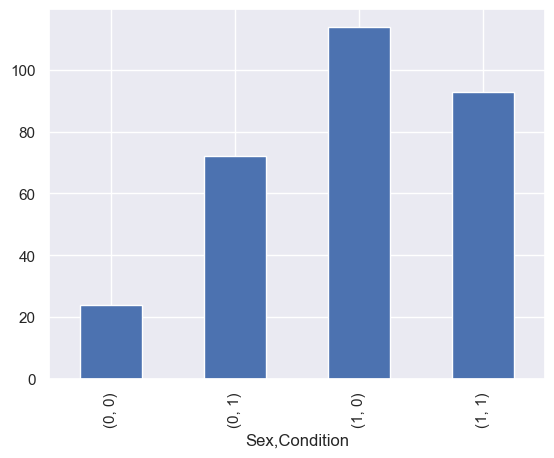

In [111]:
df.groupby(["Sex","Condition"])["Condition"].count().plot.bar()

In [128]:
rt=df.groupby([df['Sex']==0])['Condition'].sum()
rt

Sex
False    93
True     72
Name: Condition, dtype: int64

In [126]:
df[df['Condition']==1]['Condition'].count()

165

In [121]:
gh=72/165
gh

0.43636363636363634

In [124]:
jk=df[df['Sex']==1]['Condition'].sum()/df[df['Condition']==1]['Condition'].count()
jk

0.5636363636363636

In [129]:
df.columns

Index(['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol',
       'Fasting_bp', 'Resting_ecg', 'Max_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope',
       'Num_major_vessels', 'Thallium_test', 'Condition'],
      dtype='object')

In [130]:
df.groupby(["Sex","Fasting_bp"])["Fasting_bp"].count()

Sex  Fasting_bp
0    0              84
     1              12
1    0             174
     1              33
Name: Fasting_bp, dtype: int64

<AxesSubplot:xlabel='Sex,Fasting_bp'>

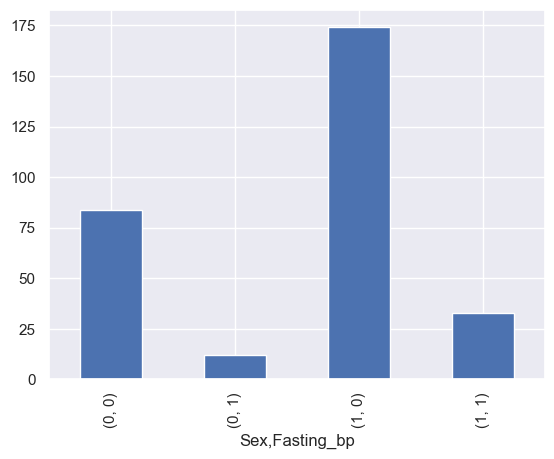

In [131]:
df.groupby(["Sex","Fasting_bp"])["Fasting_bp"].count().plot.bar()

In [132]:
df[['Fasting_bp']].value_counts()

Fasting_bp
0             258
1              45
dtype: int64

In [135]:
df.groupby(["Condition","Fasting_bp"])["Fasting_bp"].count()

Condition  Fasting_bp
0          0             116
           1              22
1          0             142
           1              23
Name: Fasting_bp, dtype: int64

<AxesSubplot:xlabel='Sex,Fasting_bp'>

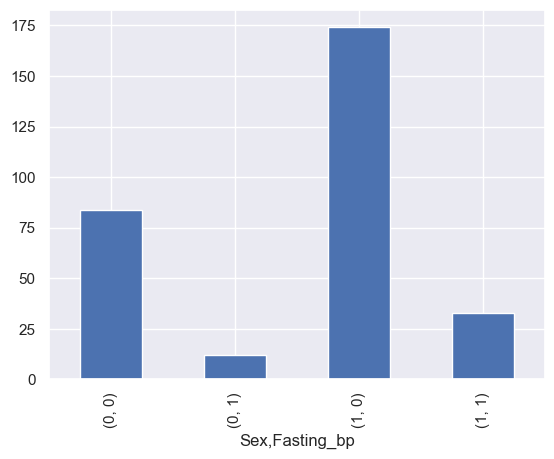

In [136]:
df.groupby(["Sex","Fasting_bp"])["Fasting_bp"].count().plot.bar()

In [137]:
df.groupby(["Sex","Condition","Fasting_bp"])["Fasting_bp"].count()

Sex  Condition  Fasting_bp
0    0          0             18
                1              6
     1          0             66
                1              6
1    0          0             98
                1             16
     1          0             76
                1             17
Name: Fasting_bp, dtype: int64

<AxesSubplot:xlabel='Sex,Condition,Fasting_bp'>

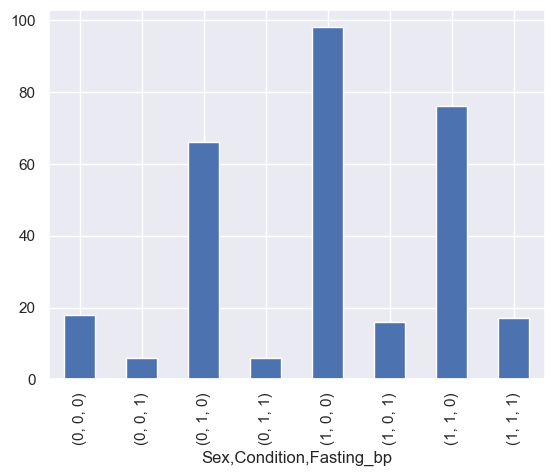

In [138]:
df.groupby(["Sex","Condition","Fasting_bp"])["Fasting_bp"].count().plot.bar()

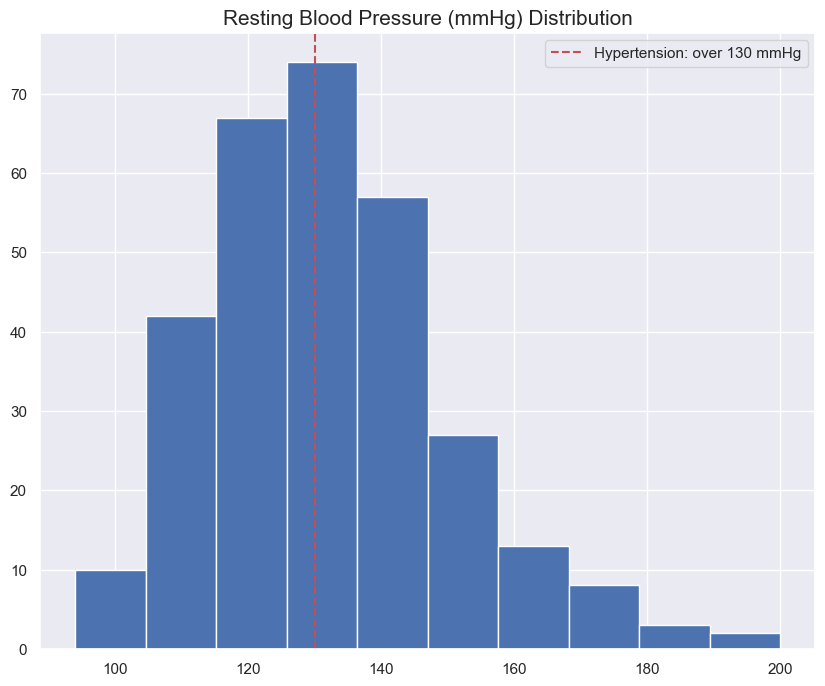

In [146]:
fig,ax=plt.subplots(figsize=(10,8))
ax.hist(df['Resting_bp'].to_numpy())
ax.set_title('Resting Blood Pressure (mmHg) Distribution', fontsize=15)
plt.axvline(x=130, color='r',linestyle='--',label='Hypertension: over 130 mmHg')
plt.legend()

C:\Users\alokd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Resting_bp'>

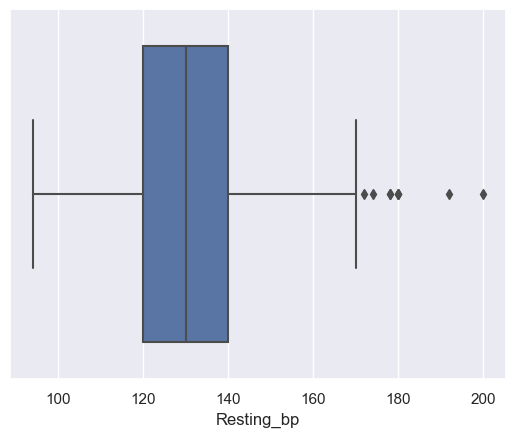

In [142]:
sns.boxplot(df['Resting_bp'])

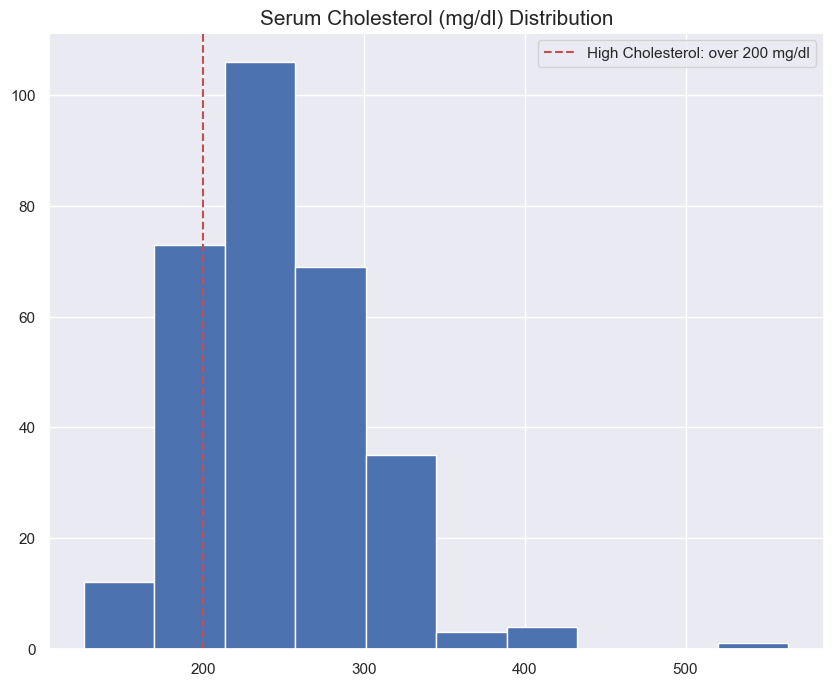

In [156]:
fig,ax=plt.subplots(figsize=(10,8))
ax.hist(df['Cholesterol'].to_numpy())
ax.set_title('Serum Cholesterol (mg/dl) Distribution', fontsize=15)
plt.axvline(x=200, color='r',linestyle='--',label='High Cholesterol: over 200 mg/dl')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


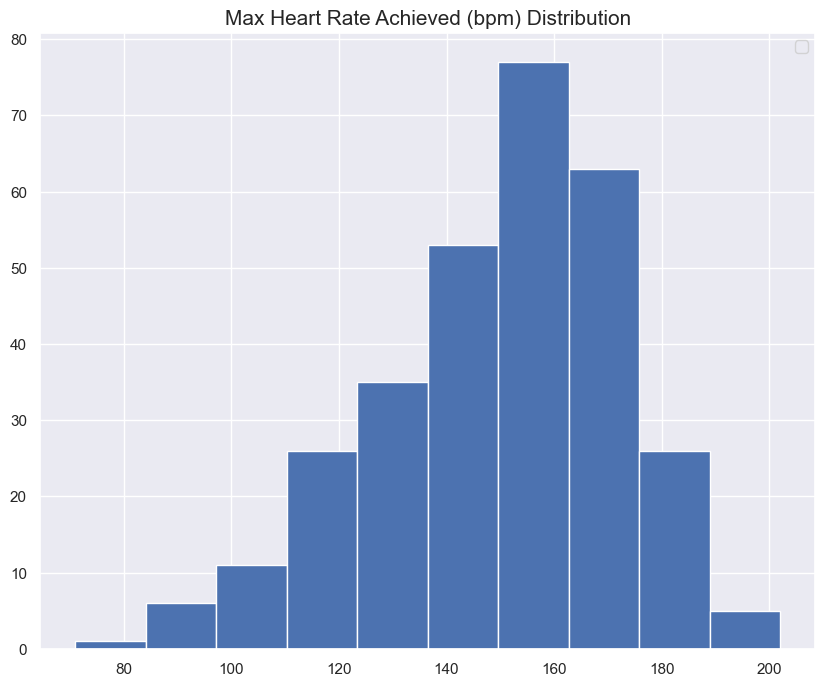

In [157]:
fig,ax=plt.subplots(figsize=(10,8))
ax.hist(df['Max_heart_rate'].to_numpy())
ax.set_title('Max Heart Rate Achieved (bpm) Distribution', fontsize=15)
plt.legend()

In [163]:
df.head(5)

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bp,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [166]:
df.columns

Index(['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol',
       'Fasting_bp', 'Resting_ecg', 'Max_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope',
       'Num_major_vessels', 'Thallium_test', 'Condition'],
      dtype='object')

In [167]:
import re
def clean_year(str_):
    str_=str_.lower()
    str_=re.sub("[^A-Za-z0-9]+", " ", str_)
    str_=str_.strip()

    return int(str_.split(" ")[0])

In [168]:
cat_columns=['Sex','Chest_pain_type','Fasting_bp','Resting_ecg','Exercise_induced_angina','ST_slope','Num_major_vessels', 'Thallium_test']
num_columns=['Age','Resting_bp', 'Cholesterol', 'Max_heart_rate','ST_depression']

# FEature Engineering¶
##Anova test=Input is numerical and output is categorical 
##Chi-Square Input is categorical and output is categorical

In [169]:
from sklearn.feature_selection import f_classif, SelectKBest

In [170]:
X= df[num_columns].to_numpy()
Y = df['Condition'].to_numpy()

In [173]:
fs = SelectKBest(k=3, score_func = f_classif)
X_selected = fs.fit_transform(X,Y)

In [174]:
fs.get_support(True)

array([0, 3, 4], dtype=int64)

##Chi_square

In [176]:
X= df[cat_columns].to_numpy()
Y = df['Condition'].to_numpy()

In [177]:
from sklearn.feature_selection import chi2

In [178]:
fs = SelectKBest(k=6, score_func = chi2)
X_selected = fs.fit_transform(X,Y)

In [179]:
fs.get_support(True)

array([0, 1, 4, 5, 6, 7], dtype=int64)

In [180]:
cat_column_selected=['Sex','Chest_pain_type','Exercise_induced_angina','ST_slope','Num_major_vessels', 'Thallium_test']
num_column_selected=['Age','Max_heart_rate','ST_depression']

In [182]:
total_feature=cat_column_selected + num_column_selected

In [183]:
X=df[total_feature].to_numpy()
Y=df['Condition'].to_numpy()

# Feature Scaling

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
scale=StandardScaler()
X_scaled=scale.fit_transform(X)

# Spliting the data

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y, test_size=0.2,shuffle =True)

# Training Decesion Tree Classifier

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [189]:
y_pred = clf.predict(X_test)

In [190]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [191]:
print(f'Accuracy of the classifier is {accuracy_score(y_test,y_pred)*100}')

Accuracy of the classifier is 86.88524590163934


In [195]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[18,  5],
       [ 3, 35]], dtype=int64)

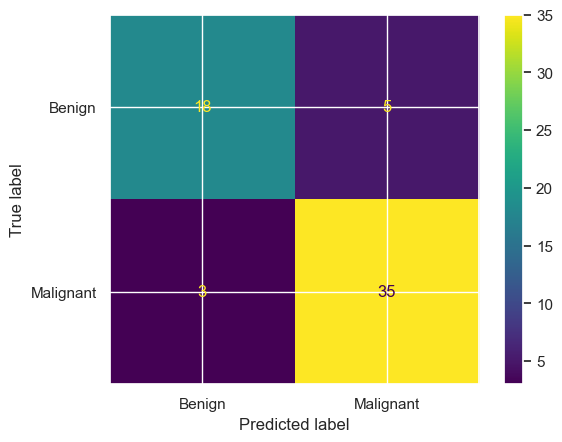

In [194]:
ConfusionMatrixDisplay(cm,display_labels=['Benign','Malignant']).plot()

In [196]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

(array([0.85714286, 0.875     ]),
 array([0.7826087 , 0.92105263]),
 array([0.81818182, 0.8974359 ]),
 array([23, 38], dtype=int64))

In [197]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y, test_size=0.2,shuffle =True)

In [202]:
from sklearn.naive_bayes import GaussianNB

In [203]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [205]:
y_pred = clf.predict(X_test)

In [206]:
print(f'Accuracy of the classifier is {accuracy_score(y_test,y_pred)*100}')

Accuracy of the classifier is 81.9672131147541
